# Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive

In [2]:
df_vf_2024 = pd.read_csv("../csv_clean/valeurs_foncieres_2024.csv")
df_vf_2023 = pd.read_csv("../csv_clean/valeurs_foncieres_2023.csv")
df_vf_2022 = pd.read_csv("../csv_clean/valeurs_foncieres_2022.csv")
df_parcs = pd.read_csv("../csv_clean/parcs_jardins_communes_agg.csv")
df_college = pd.read_csv("../csv_clean/colleges.csv")
df_lycee = pd.read_csv("../csv_clean/lycees.csv")

In [3]:
# data frame des valeurs foncières 
df_vf = {
    "vf_24": df_vf_2024,
    "vf_23": df_vf_2023,
    "vf_22": df_vf_2022
}

In [4]:
# tous les dataframe dans un seul dictionnaire 
df = {
    "vf_24": df_vf_2024,
    "vf_23": df_vf_2023,
    "vf_22": df_vf_2022,
    "parcs": df_parcs,
    "college": df_college,
    "lycee": df_lycee
}

# Widgets simples

In [5]:
alpha = 0.6 # transparance 

# join (par intersection) des valeurs foncières 2024, 2023 et 2022 
communes_commun = np.intersect1d(np.intersect1d(df_vf["vf_22"]["code_commune"], df_vf["vf_23"]["code_commune"]), df_vf["vf_24"]["code_commune"])

# définition des données pour les utiliser dans le widget 
prix_22 = df_vf["vf_22"].set_index("code_commune").loc[communes_commun, "prix_median"].values
prix_23 = df_vf["vf_23"].set_index("code_commune").loc[communes_commun, "prix_median"].values
prix_24 = df_vf["vf_24"].set_index("code_commune").loc[communes_commun, "prix_median"].values

# graphe simple (plot)
plt.figure(figsize=(12,6))
plt.plot(communes_commun, prix_22, label="2022", alpha=alpha, color='skyblue')
plt.plot(communes_commun, prix_23, label="2023", alpha=alpha, color='blue')
plt.plot(communes_commun, prix_24, label="2024", alpha=alpha, color='midnightblue')
plt.title("Prix médian par commune")
plt.xlabel("Code commune")
plt.ylabel("Prix médian (€)")
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'prix_median'

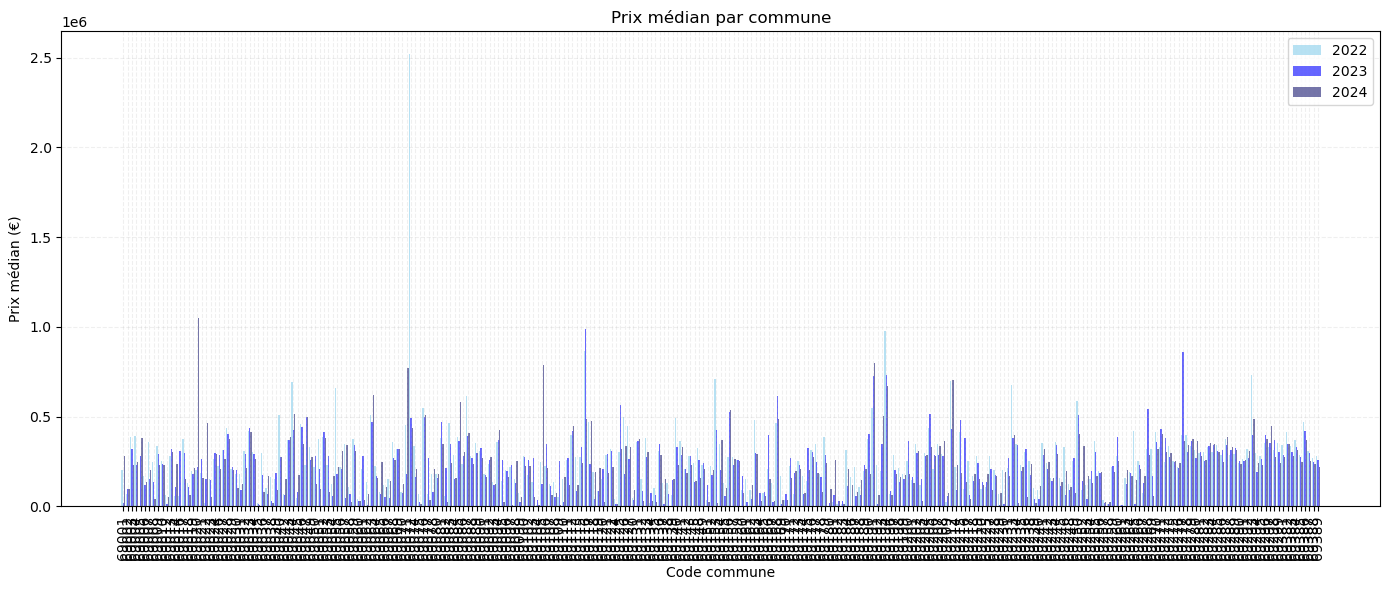

In [ ]:
alpha = 0.6 # transparance 

# join (par intersection) des valeurs foncières 2024, 2023 et 2022 
communes_commun = np.intersect1d(np.intersect1d(df_vf["vf_22"]["code_commune"], df_vf["vf_23"]["code_commune"]), df_vf["vf_24"]["code_commune"])

# définition des données pour les utiliser dans le widget 
prix_22 = df_vf["vf_22"].set_index("code_commune").loc[communes_commun, "prix_median"].values
prix_23 = df_vf["vf_23"].set_index("code_commune").loc[communes_commun, "prix_median"].values
prix_24 = df_vf["vf_24"].set_index("code_commune").loc[communes_commun, "prix_median"].values

x = np.arange(len(communes_commun))
width = 0.30

# 3 graph (bar)
plt.figure(figsize=(14, 6))
plt.bar(x - width, prix_22, width, label="2022", alpha=alpha, color='skyblue')
plt.bar(x, prix_23, width, label="2023", alpha=alpha, color='blue')
plt.bar(x + width, prix_24, width, label="2024", alpha=alpha, color='midnightblue')

plt.title("Prix médian par commune")
plt.xlabel("Code commune")
plt.ylabel("Prix médian (€)")
plt.xticks(x, communes_commun, rotation=90) # communes (axes ordonnées)
plt.legend()
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

C:\Users\jadep\AppData\Local\Temp\ipykernel_10464\24042561.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


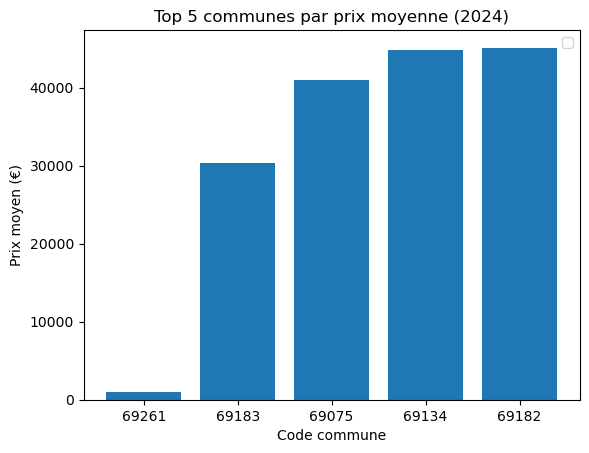

In [ ]:
# création dataframe (head) avec les pris les plus bas 
top24 = df_vf_2024.sort_values(by="prix_moyen", ascending=True).head(5)

# graphe (bar)
plt.bar(top24["code_commune"].astype(str), top24["prix_moyen"])
plt.title("Top 5 communes par prix moyenne (2024)")
plt.xlabel("Code commune")
plt.ylabel("Prix moyen (€)")
plt.legend()
plt.show()

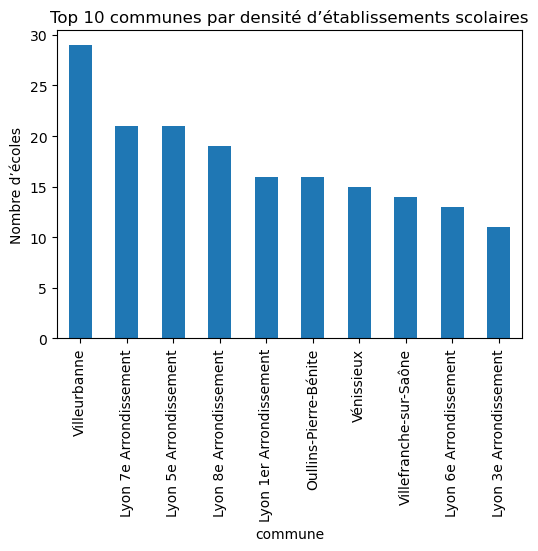

In [ ]:
# join (concaténation) des collèges et lycées (seulement communes)
df_ecoles = pd.concat([
    df_college[["commune"]],
    df_lycee[["commune"]]
])

# compter le nombre d'école
densite = df_ecoles["commune"].value_counts().head(10)

# graphe (bar)
plt.figure(figsize=(6,4))
densite.plot(kind='bar')
plt.title("Top 10 communes par densité d’établissements scolaires")
plt.ylabel("Nombre d’écoles")
plt.show()

# Widget interactif

In [ ]:
def evolution_prix(commune_code):
    data = []
    years = []
    for year, df in df_vf.items():
        match = df[df["code_commune"] == commune_code]
        if not match.empty:
            data.append(match["prix_median"].values[0])
            years.append(year)
    if not data:
        print("Commune non trouvée.")
        return
    
    plt.figure(figsize=(6,4))
    plt.plot(years, data, marker='o')
    plt.title(f"Évolution du prix médian - Commune {commune_code}")
    plt.xlabel("Année")
    plt.ylabel("Prix médian (€)")
    plt.grid(True)
    plt.show()

interact(evolution_prix, commune_code=widgets.Dropdown(
    options=sorted(df_vf_2024["code_commune"].unique()),
    description='Commune :'
))

interactive(children=(Dropdown(description='Commune :', options=(np.int64(69001), np.int64(69002), np.int64(69…

<function __main__.evolution_prix(commune_code)>

In [ ]:
def filtrer_par_budget(budget_min, budget_max):
    filt = df_vf_2024[
        (df_vf_2024["prix_median"] >= budget_min) & 
        (df_vf_2024["prix_median"] <= budget_max)
    ]
    
    plt.figure(figsize=(14, 5))
    plt.bar(filt["code_commune"].astype(str), filt["nb_ventes"], color='skyblue', alpha=0.7, width=0.8)
    
    plt.title(f"Communes avec prix médian entre {budget_min:,.0f} € et {budget_max:,.0f} €")
    plt.xlabel("Code commune")
    plt.ylabel("Nombre de ventes")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

interact(
    filtrer_par_budget, 
    budget_min=widgets.IntSlider(min=50000, max=500000, step=50000, value=100000, description="Budget min (€)"),
    budget_max=widgets.IntSlider(min=100000, max=600000, step=50000, value=200000, description="Budget max (€)")
)

interactive(children=(IntSlider(value=100000, description='Budget min (€)', max=500000, min=50000, step=50000)…

<function __main__.filtrer_par_budget(budget_min, budget_max)>

In [ ]:
# Fusion avec espaces verts
merged = df_vf_2024.merge(df_parcs[["code_commune", "score_espaces_verts"]], on="code_commune", how="left")

def score_familial(prix_poids, surface_poids, verts_poids):
    # Normalisation
    merged["score_prix"] = 1 / merged["prix_median"]
    merged["score_surface"] = merged["surface_moyenne"] / merged["surface_moyenne"].max()
    merged["score_verts"] = merged["score_espaces_verts"] / merged["score_espaces_verts"].max()
    
    merged["score_global"] = (
        prix_poids * merged["score_prix"] +
        surface_poids * merged["score_surface"] +
        verts_poids * merged["score_verts"]
    )

    top = merged.sort_values("score_global", ascending=False).head(5)

    plt.bar(top["code_commune"].astype(str), top["score_global"])
    plt.title("Top 5 communes familiales")
    plt.xlabel("Commune")
    plt.ylabel("Score global")
    plt.show()

interact(
    score_familial,
    prix_poids=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.3, description="Prix"),
    surface_poids=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.3, description="Surface"),
    verts_poids=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4, description="Espaces verts")
)

interactive(children=(FloatSlider(value=0.3, description='Prix', max=1.0), FloatSlider(value=0.3, description=…

<function __main__.score_familial(prix_poids, surface_poids, verts_poids)>

In [ ]:
df_vf_2024.head()

,code_commune,nb_ventes,prix_median,prix_moyen,surface_moyenne,pieces_moyennes
0,69001,25,280000.0,223615.0,107.0,3.0
1,69002,24,94000.0,134785.0,75.0,1.0
2,69003,119,231000.0,311187.0,79.0,1.0
3,69004,24,244699.0,260873.0,86.0,2.0
4,69005,20,380000.0,301314.0,201.0,2.0


In [ ]:
def comparer_communes_couleurs_commune(commune1, commune2):
    subset = df_vf_2024[df_vf_2024["code_commune"].isin([commune1, commune2])]
    communes = [str(commune1), str(commune2)]
    couleurs = ['dodgerblue', 'orange']  # Couleur par commune
    
    # Récupération des valeurs
    prix = [
        subset[subset["code_commune"] == commune1]["prix_median"].values[0],
        subset[subset["code_commune"] == commune2]["prix_median"].values[0]
    ]
    surface = [
        subset[subset["code_commune"] == commune1]["surface_moyenne"].values[0],
        subset[subset["code_commune"] == commune2]["surface_moyenne"].values[0]
    ]
    pieces = [
        subset[subset["code_commune"] == commune1]["pieces_moyennes"].values[0],
        subset[subset["code_commune"] == commune2]["pieces_moyennes"].values[0]
    ]
    
    # Création de 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    
    plt_pr = axes[0].bar(communes, prix, color=couleurs)
    axes[0].set_title('Prix médian (€)')
    axes[0].legend(plt_pr, communes, title="Communes")
    
    plt_s = axes[1].bar(communes, surface, color=couleurs)
    axes[1].set_title('Surface moyenne (m²)')
    axes[1].legend(plt_s, communes, title="Communes")
    
    plt_pi = axes[2].bar(communes, pieces, color=couleurs)
    axes[2].set_title('Pièces moyennes')
    axes[2].legend(plt_pi, communes, title="Communes")
    
    plt.suptitle("Comparaison des communes")
    plt.show()

interact(
    comparer_communes_couleurs_commune,
    commune1=widgets.Dropdown(options=sorted(df_vf_2024["code_commune"].unique()), description="Commune 1", value=69001),
    commune2=widgets.Dropdown(options=sorted(df_vf_2024["code_commune"].unique()), description="Commune 2", value=69002)
)

interactive(children=(Dropdown(description='Commune 1', options=(np.int64(69001), np.int64(69002), np.int64(69…

<function __main__.comparer_communes_couleurs_commune(commune1, commune2)>

In [ ]:
# Poids 
prix_poids = 0.4
surface_poids = 0.2
piece_poids = 0.3
parc_poids = 0.1

def complexe(commune_code, budget, surface, nbr_piece, nbr_ecole, nbr_parc):
    # Fusion des écoles
    df_ecoles = pd.concat([
        df_college[["commune"]],
        df_lycee[["commune"]]
    ])
    ecoles = df_ecoles["commune"].value_counts().reset_index()
    ecoles.columns = ["commune", "nb_ecoles"]

    # Fusion des parcs avec les logements
    merged = df_vf_2024.merge(df_parcs[["code_commune", "nb_parcs"]], on="code_commune", how="left")
    
    # Filtrage selon les critères choisis
    filtred_df = merged[
        (merged["prix_median"] >= budget[0]) & 
        (merged["prix_median"] <= budget[1]) & 
        (merged["surface_moyenne"] >= surface[0]) &
        (merged["surface_moyenne"] <= surface[1]) &
        (merged["pieces_moyennes"] >= nbr_piece[0]) &
        (merged["pieces_moyennes"] <= nbr_piece[1]) &
        (merged["nb_parcs"] >= nbr_parc[0]) &
        (merged["nb_parcs"] <= nbr_parc[1])
    ].copy()
    
    # Normalisation des scores
    filtred_df["score_prix"] = 1 - (filtred_df["prix_median"] / filtred_df["prix_median"].max())
    filtred_df["score_surface"] = filtred_df["surface_moyenne"] / filtred_df["surface_moyenne"].max()
    filtred_df["score_piece"] = filtred_df["pieces_moyennes"] / filtred_df["pieces_moyennes"].max()
    filtred_df["score_parc"] = filtred_df["nb_parcs"] / filtred_df["nb_parcs"].max()
    
    # Calcul du score global pondéré
    filtred_df["score"] = (
        prix_poids * filtred_df["score_prix"] +
        surface_poids * filtred_df["score_surface"] +
        piece_poids * filtred_df["score_piece"] +
        parc_poids * filtred_df["score_parc"]
    )
    
    final_df = filtred_df[filtred_df["code_commune"] == commune_code]
    
    # Si aucune donnée n’est trouvée
    if final_df.empty:
        if merged[merged["code_commune"] == commune_code].empty:
            print("Problème !")
        else:
            print('Prix : ', merged[
                (merged["prix_median"] >= budget[0]) & 
                (merged["prix_median"] <= budget[1])
                ].copy())
            print('Surface : ', merged[
                (merged["surface_moyenne"] >= surface[0]) & 
                (merged["surface_moyenne"] <= surface[1])
                ].copy())
            print('Pièces : ', merged[
                (merged["pieces_moyennes"] >= nbr_piece[0]) & 
                (merged["pieces_moyennes"] <= nbr_piece[1])
                ].copy())
            print('Parcs : ', merged[
                (merged["nb_parcs"] >= nbr_parc[0]) & 
                (merged["nb_parcs"] <= nbr_parc[1])
                ].copy())
        print(f"Aucune donnée pour la commune {commune_code} avec ces critères.")
        return
    
    top = final_df.sort_values("score", ascending=False).head(5)
    
    plt.bar(top["commune"].astype(str), top["score"])
    plt.title(f"Top 5 logements par commune : {top['commune'].iloc[0]}")
    plt.xlabel("Communes")
    plt.ylabel("Scores")
    plt.xticks(rotation=45)
    plt.show()

interact(
    complexe, 
    commune_code=widgets.Dropdown(options=sorted(df_vf_2024["code_commune"].unique()), description='Commune :'),
    budget=widgets.IntRangeSlider(min=50000, max=1000000, step=50000, value=[100000, 500000], description="Budget (€)"),
    surface=widgets.IntRangeSlider(min=20, max=250, step=1, value=[30,150], description="Surface (m²)"),
    nbr_piece=widgets.IntRangeSlider(min=1, max=3, step=1, value=[3,6], description="Nbr pièces"),
    nbr_ecole=widgets.IntRangeSlider(min=0, max=50, step=1, value=[2,5], description="Nbr écoles"),
    nbr_parc=widgets.IntRangeSlider(min=0, max=25, step=1, value=[1,10], description="Nbr parcs")
)

interactive(children=(Dropdown(description='Commune :', options=(np.int64(69001), np.int64(69002), np.int64(69…

<function __main__.complexe(commune_code, budget, surface, nbr_piece, nbr_ecole, nbr_parc)>